In [188]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [189]:
df = pd.read_csv('C:\\Github\\Credit_risk_analysis_with_ExplainableAI\\data\\raw\\updated_credit_risk_dataset-without_missing_values.csv')


In [190]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [192]:
df.duplicated().sum()

165

In [193]:
df.drop_duplicates(inplace=True)

In [194]:
df.duplicated().sum()

0

In [195]:
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include=['float', 'int64']))
outliers = np.abs((z_scores) > 3).all(axis=1)  
outliers_count = outliers.sum()
print(outliers_count)

0


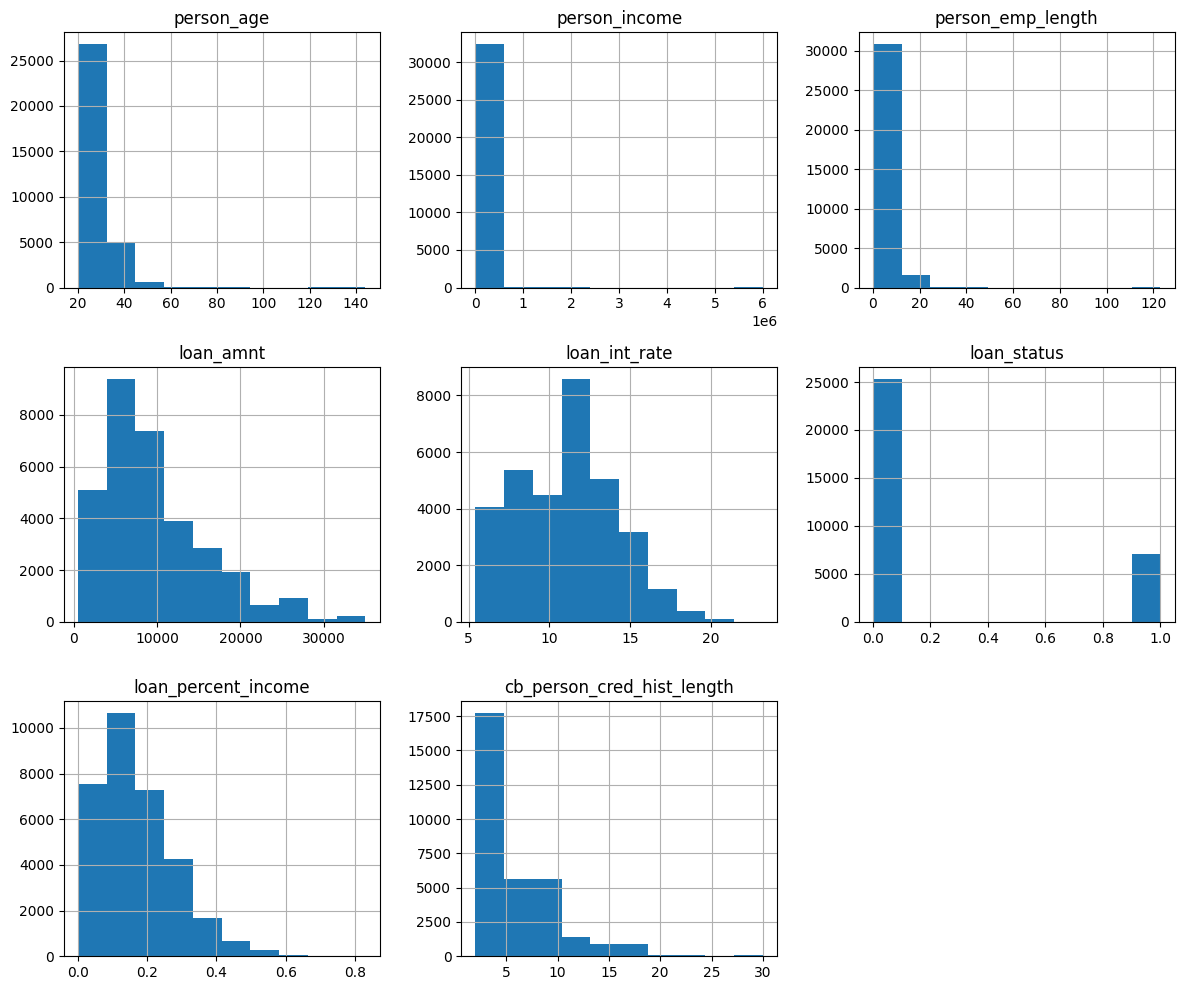

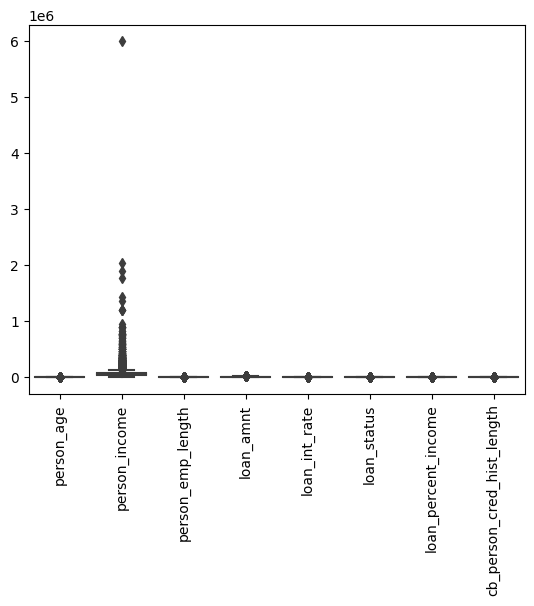

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplot for all numerical columns
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()


In [197]:
# Define cap thresholds (99th percentile)
age_cap = df['person_age'].quantile(0.99)
income_cap = df['person_income'].quantile(0.99)
loan_amnt_cap = df['loan_amnt'].quantile(0.99)
emp_length_cap = df['person_emp_length'].quantile(0.99)

#  capping for outliers
df['person_age'] = np.where(df['person_age'] > age_cap, age_cap, df['person_age'])
df['person_income'] = np.where(df['person_income'] > income_cap, income_cap, df['person_income'])
df['loan_amnt'] = np.where(df['loan_amnt'] > loan_amnt_cap, loan_amnt_cap, df['loan_amnt'])
df['person_emp_length'] = np.where(df['person_emp_length'] > emp_length_cap, emp_length_cap, df['person_emp_length'])


df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.671459,64354.202770,4.728653,9560.835698,11.014662,0.218688,0.170250,5.811297
std,5.921032,37800.895594,3.851410,6203.174732,3.083050,0.413363,0.106812,4.059030
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38542.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79218.000000,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,50.000000,225000.000000,17.000000,29800.000000,23.220000,1.000000,0.830000,30.000000


# Encoding non - numerical columns

In [198]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,17.0,PERSONAL,D,29800.0,16.02,1,0.59,Y,3
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.57,N,3
3,23.0,65500.0,RENT,4.0,MEDICAL,C,29800.0,15.23,1,0.53,N,2
4,24.0,54400.0,RENT,8.0,MEDICAL,C,29800.0,14.27,1,0.55,Y,4


In [199]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [200]:
df = pd.get_dummies(df, columns=['person_home_ownership'], drop_first=True)


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32416 non-null  float64
 1   person_income                32416 non-null  float64
 2   person_emp_length            32416 non-null  float64
 3   loan_intent                  32416 non-null  object 
 4   loan_grade                   32416 non-null  object 
 5   loan_amnt                    32416 non-null  float64
 6   loan_int_rate                32416 non-null  float64
 7   loan_status                  32416 non-null  int64  
 8   loan_percent_income          32416 non-null  float64
 9   cb_person_default_on_file    32416 non-null  object 
 10  cb_person_cred_hist_length   32416 non-null  int64  
 11  person_home_ownership_OTHER  32416 non-null  uint8  
 12  person_home_ownership_OWN    32416 non-null  uint8  
 13  person_home_owne

In [202]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])   

In [204]:
df.infer_objects().dtypes

person_age                     float64
person_income                  float64
person_emp_length              float64
loan_intent                     object
loan_grade                      object
loan_amnt                      float64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_default_on_file        int32
cb_person_cred_hist_length       int64
person_home_ownership_OTHER      uint8
person_home_ownership_OWN        uint8
person_home_ownership_RENT       uint8
dtype: object

In [205]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [206]:
df = pd.get_dummies(df, columns=['loan_intent'], prefix='loan_intent', drop_first=False)


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     32416 non-null  float64
 1   person_income                  32416 non-null  float64
 2   person_emp_length              32416 non-null  float64
 3   loan_grade                     32416 non-null  object 
 4   loan_amnt                      32416 non-null  float64
 5   loan_int_rate                  32416 non-null  float64
 6   loan_status                    32416 non-null  int64  
 7   loan_percent_income            32416 non-null  float64
 8   cb_person_default_on_file      32416 non-null  int32  
 9   cb_person_cred_hist_length     32416 non-null  int64  
 10  person_home_ownership_OTHER    32416 non-null  uint8  
 11  person_home_ownership_OWN      32416 non-null  uint8  
 12  person_home_ownership_RENT     32416 non-null 

In [208]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [209]:
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grade'] = df['loan_grade'].map(grade_mapping)
df.drop('loan_grade', axis=1, inplace=True)


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     32416 non-null  float64
 1   person_income                  32416 non-null  float64
 2   person_emp_length              32416 non-null  float64
 3   loan_amnt                      32416 non-null  float64
 4   loan_int_rate                  32416 non-null  float64
 5   loan_status                    32416 non-null  int64  
 6   loan_percent_income            32416 non-null  float64
 7   cb_person_default_on_file      32416 non-null  int32  
 8   cb_person_cred_hist_length     32416 non-null  int64  
 9   person_home_ownership_OTHER    32416 non-null  uint8  
 10  person_home_ownership_OWN      32416 non-null  uint8  
 11  person_home_ownership_RENT     32416 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION  32416 non-null 

In [211]:
print(df['loan_status'].value_counts(normalize=True))

0    0.781312
1    0.218688
Name: loan_status, dtype: float64


In [212]:
df.to_csv('cleaned_loan_data.csv', index=False)
